In [123]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv 


import time
start_time = time.time()

In [124]:
def imgAnalyzer(imgAddress):

    img = cv.imread(imgAddress, 0) #Lendo imagem


    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.show()

    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)
    
    ret,img = cv.threshold(img,127,255,0)
    element = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
    done = False

    plt.subplot(121),plt.imshow(img),plt.title('Shape of img ')

    plt.show()

    cont = 0

    while( not done):
        eroded = cv.erode(img,element)
        temp = cv.dilate(eroded,element)
        temp = cv.subtract(img,temp)
        skel = cv.bitwise_or(skel,temp)
        img = eroded.copy()
    
        zeros = size - cv.countNonZero(img)
        if zeros==size:
            done = True
    
        plt.imshow(skel,cmap="gray"), plt.title("Img in iteration {}".format(cont))
        plt.xticks([]), plt.yticks([])
        plt.show()
        cont += 1 

In [125]:
# size = np.size(img)
# skel = np.zeros(img.shape,np.uint8)
 
# ret,img = cv.threshold(img,127,255,0)
# element = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
# done = False

# plt.subplot(121),plt.imshow(img),plt.title('Shape of img ')

# plt.show()

In [126]:
# cont = 0

# while( not done):
#     eroded = cv.erode(img,element)
#     temp = cv.dilate(eroded,element)
#     temp = cv.subtract(img,temp)
#     skel = cv.bitwise_or(skel,temp)
#     img = eroded.copy()
 
#     zeros = size - cv.countNonZero(img)
#     if zeros==size:
#         done = True
 
#     plt.imshow(skel,cmap="gray"), plt.title("Img in iteration {}".format(cont))
#     plt.xticks([]), plt.yticks([])
#     plt.show()
#     cont += 1 
# # cv.imshow("skel",skel)
# # cv.waitKey(0)
# # cv.destroyAllWindows()


# # plt.subplot(121),plt.imshow(skel),plt.title('Após bitwise or')
# # plt.xticks([]), plt.yticks([])

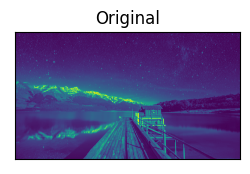

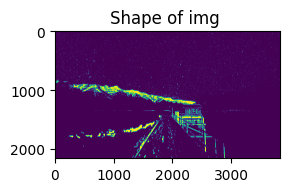

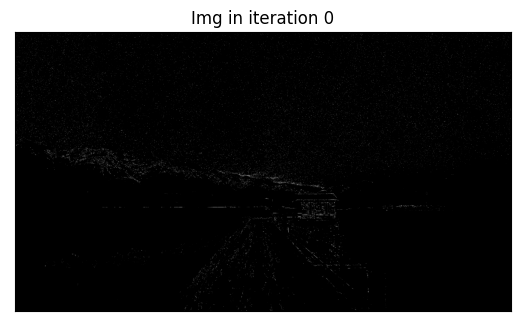

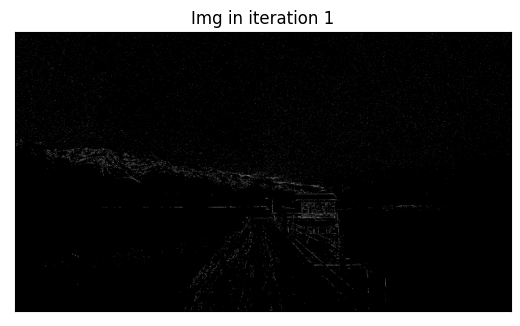

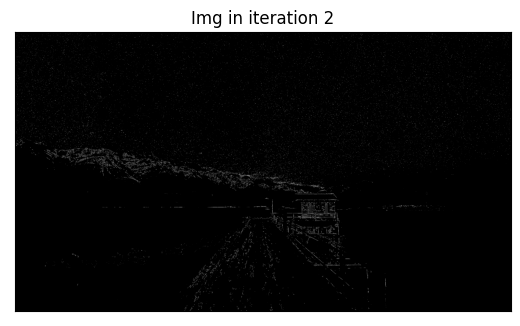

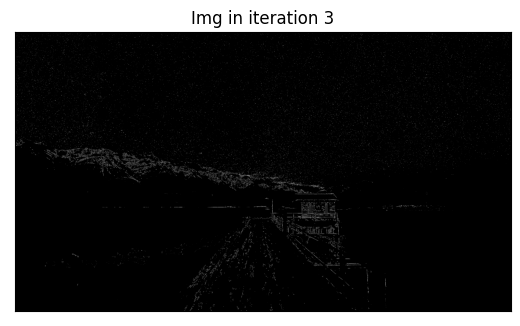

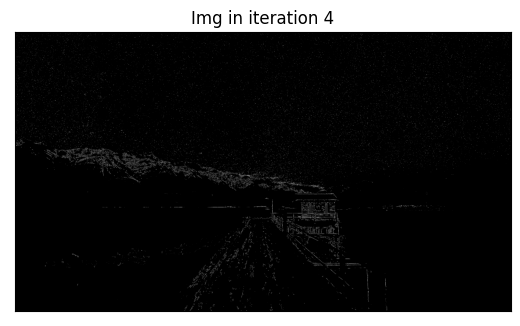

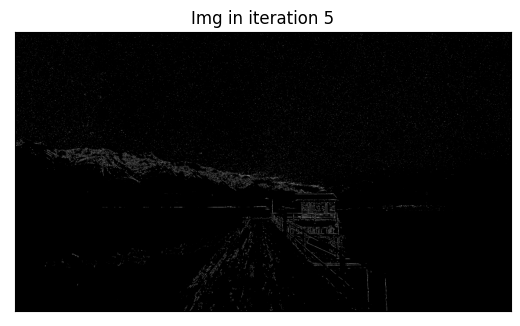

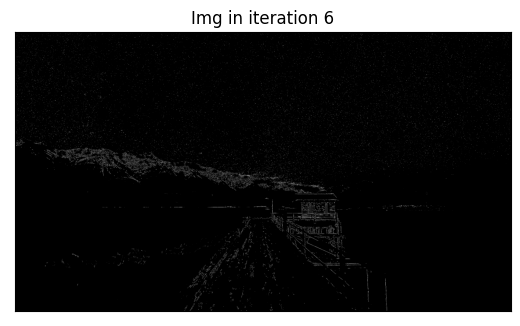

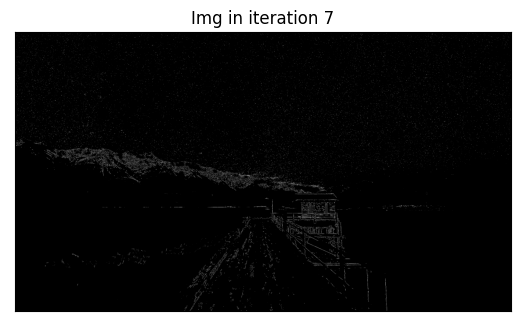

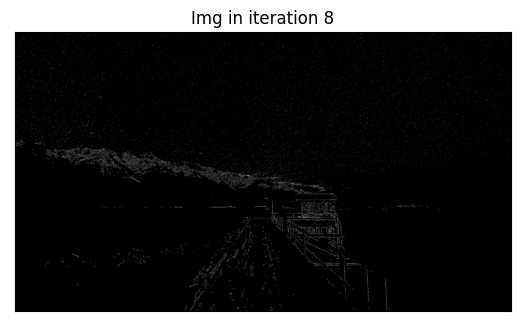

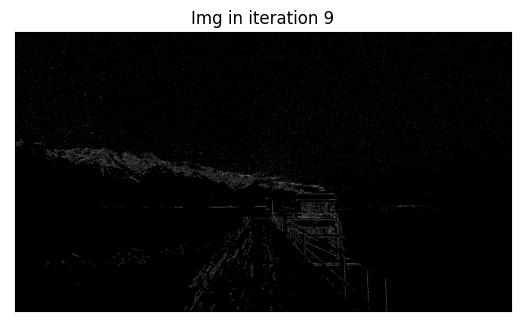

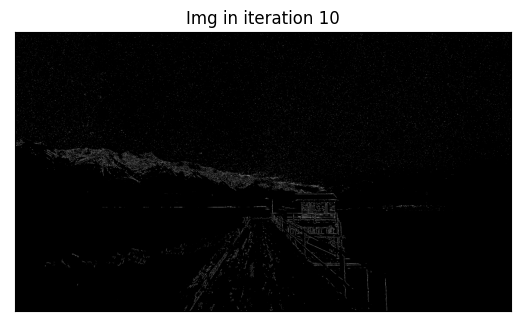

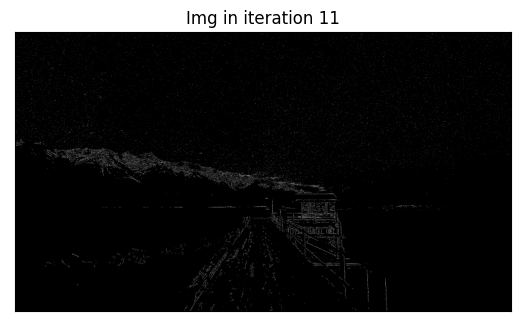

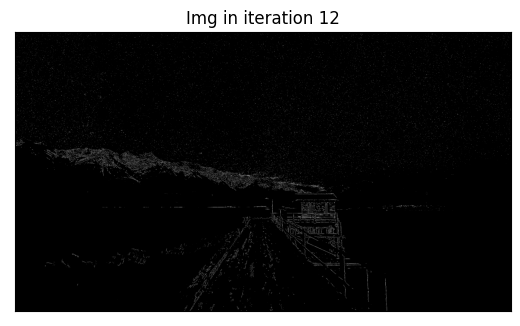

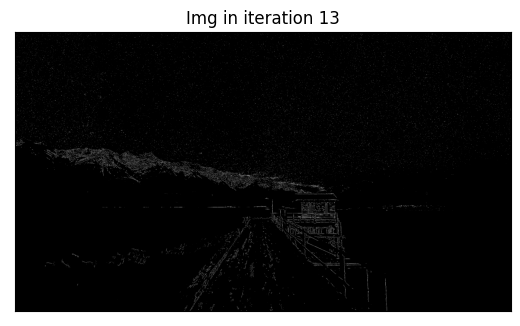

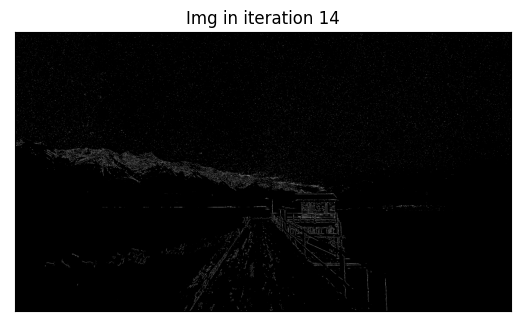

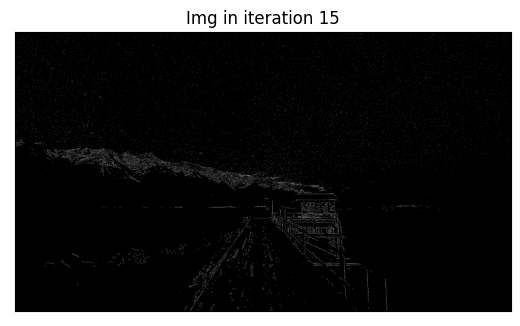

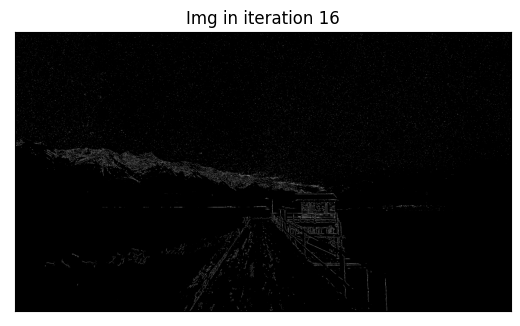

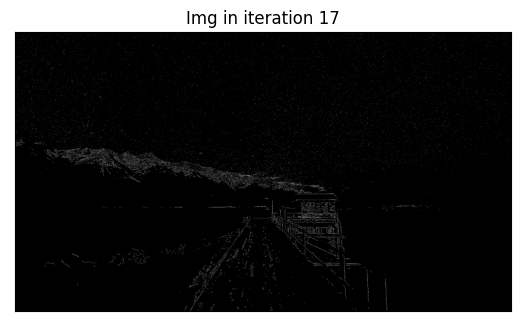

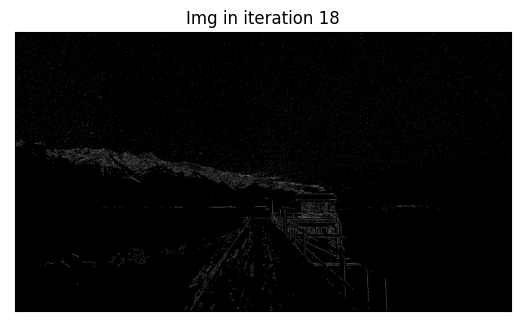

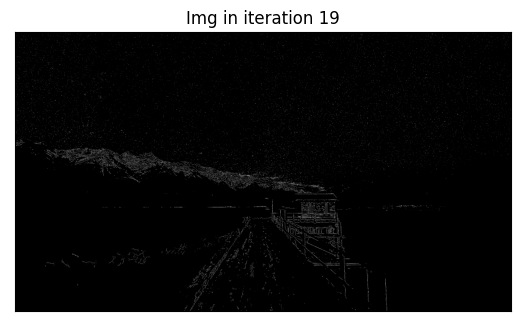

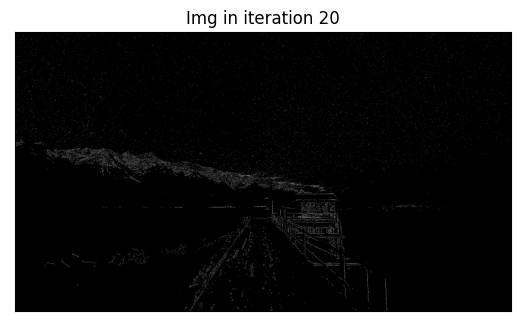

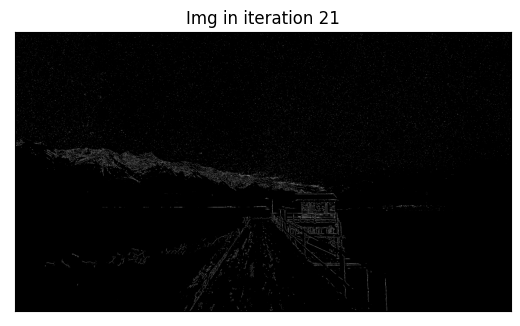

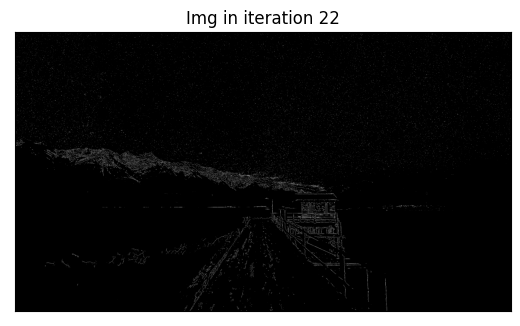

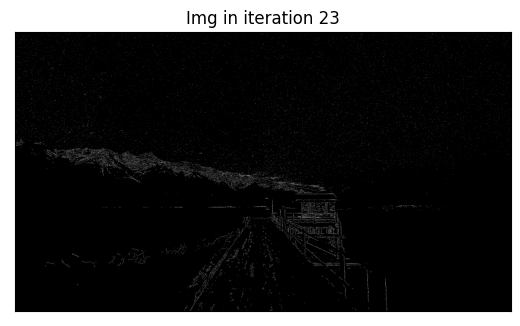

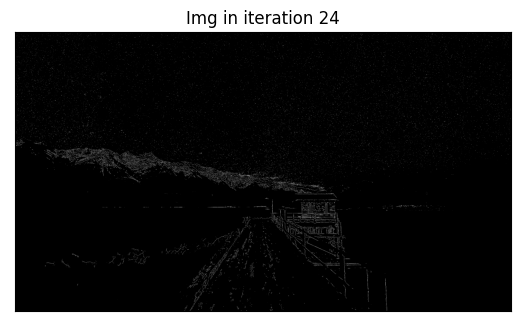

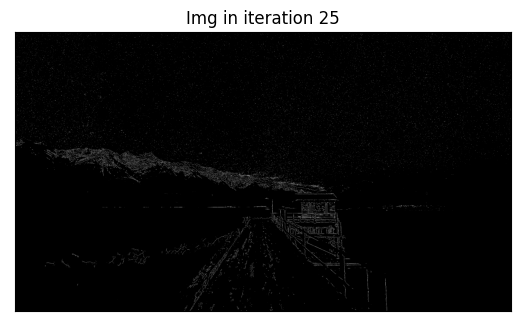

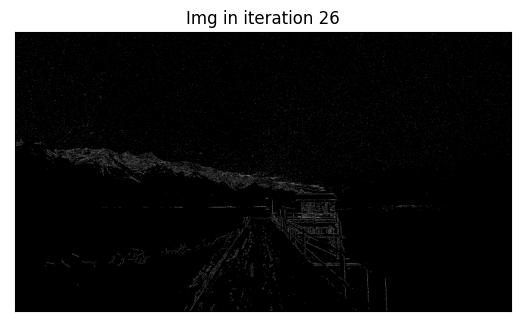

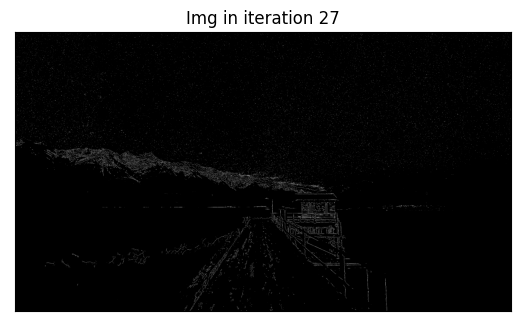

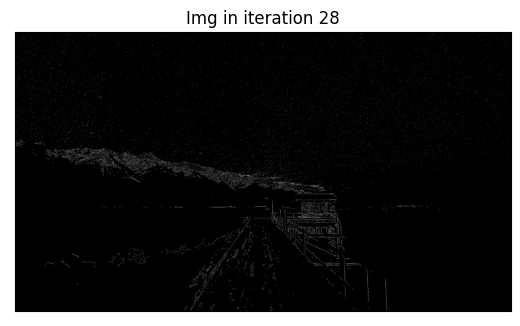

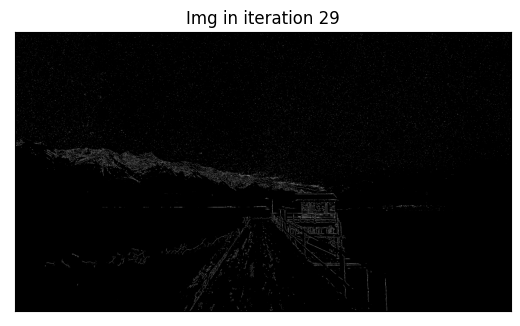

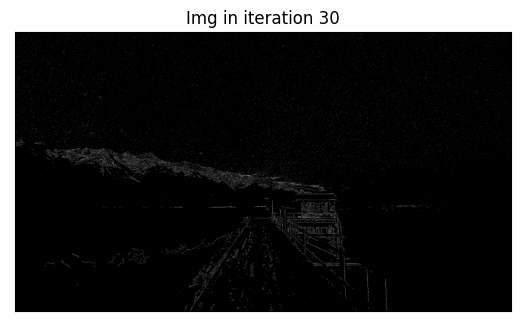

In [127]:
imgAnalyzer('images/sky-watter.jpg')
print("--- Tempo de execucao de: %s segundos ---" % (time.time() - start_time))